# Building a wordcloud based on one year of bulletins

## Créer un fichier contenant les bulletins d'une année donnée

In [1]:
year = 1945

In [2]:
# Lister les fichiers de cette année

from os import listdir
from os.path import isfile, join

data_path = '../data'
txt_path = '../data/txt'

txts = [f for f in listdir(txt_path) if isfile(join(txt_path, f)) and str(year) in f]
txts

['Bxl_1945_Tome_II1_Part_8.txt',
 'Bxl_1945_Tome_II1_Part_9.txt',
 'Bxl_1945_Tome_II2_Part_5.txt',
 'Bxl_1945_Tome_II2_Part_4.txt',
 'Bxl_1945_Tome_II2_Part_1.txt',
 'Bxl_1945_Tome_II2_Part_3.txt',
 'Bxl_1945_Tome_II2_Part_2.txt',
 'Bxl_1945_Tome_I_Part_1.txt',
 'Bxl_1945_Tome_I_Part_2.txt',
 'Bxl_1945_Tome_I_Part_3.txt',
 'Bxl_1945_Tome_I_Part_4.txt',
 'Bxl_1945_Tome_II1_Part_1.txt',
 'Bxl_1945_Tome_II1_Part_2.txt',
 'Bxl_1945_Tome_II1_Part_3.txt',
 'Bxl_1945_Tome_II1_Part_7.txt',
 'Bxl_1945_Tome_II1_Part_6.txt',
 'Bxl_1945_Tome_II1_Part_4.txt',
 'Bxl_1945_Tome_II1_Part_5.txt']

In [3]:
# Stocker le contenu de ces fichiers dans une liste

content_list = []
for txt in txts:
    with open(f'{txt_path}/{txt}', encoding='utf-8') as f:
        content_list.append(f.read())


In [4]:
len(content_list)

18

In [13]:
content_list[0][:1000]

'—\n\n1051 —\n\nRenseignements statistiques pour l\'année scolaire\n1944-1945.\nN. B. — Chaque élève, même s\'il a fréquenté deux ou plusieurs n\'est compté qu\'une seule fois. cours,\n\nNombre d\'élèves ECOLES\n-S <J\n\nNombre d\'élèves domiciliés\n\nNombre d\'élèves\nC O O\nOi\n\n21\n\nS\n\nc\n\nm\n\nc\n\n_ C ~ œ\n\nç o\n\nri\nXi\n\nC\nce\n\nm\n\nc"" 5 o -S* e s\no\n„,\n\nF\n\nO)\n\n0 3\n\nMl\n\nm O\n\nf\n\nA. Enseignement du jour.\n1. M é c a n i q u e et Electricité. 2. M é c a n i q u e de précision. 3. Prof, et artisanal de méc. dentaire. 4. Tailleurs. B. Enseignement 769 98 187 19 582 79 139 11 399 59 231 28 731 90\n\n30 286\n\n3 61\n\n27 225\n\n6 58\n\n21 126\n\n3 102\n\n28 279\n\ndu soir.\n\n5. Industrielle. 6. M é c a n i q u e et Electricité. 7. Serrurerie. 8. Plomberie. 9. Tapissiersgarnisseurs. 10. Peinture du Bâtiment. 11. Tailleurs. 12. Fourrure. 1 3. LingerieChemiserie. 14. ChaussureMaroquinerie. 15. Bijouterie.\n\n411 731 128 119 86 53 188 62 58 177 114 341 154 62 55 3

In [28]:
with open(f'{data_path}/{year}.txt', 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

## Enlever les stopwords, les mots courts et non alphabétiques et stocker le résultat dans un nouveau fichier

In [29]:
# Appliquer la fonction filtering (que vous pouvez customiser)

from filtering import filtering

filtering(year, folder=data_path)

'Output has been written in ../data/1945_keywords.txt!'

In [31]:
# Vérifier le résultat

with open(f'{data_path}/{year}_keywords.txt', 'r') as f:
    after = f.read()

after[:500]

'renseignements statistiques scolaire chaque élève fréquenté plusieurs compté seule fois élèves ecoles élèves domiciliés élèves enseignement jour electricité précision prof artisanal méc dentaire tailleurs enseignement soir industrielle electricité serrurerie plomberie tapissiersgarnisseurs peinture bâtiment tailleurs fourrure lingeriechemiserie chaussuremaroquinerie bijouterie coiffure typographie lithographie reliure dorure pourcentage rapport inscrits ecole professionnelle menuiserie ebénister'

## Créer le word cloud

In [37]:
import subprocess

command = [
    'wordcloud_cli',
    '--text', f'{data_path}/{year}_keywords.txt',
    '--imagefile', f'{data_path}/{year}.png',
    '--width', '2000',
    '--height', '1000',
]

subprocess.run(command, capture_output=True)

CompletedProcess(args=['wordcloud_cli', '--text', '../data/1945_keywords.txt', '--imagefile', '../data/1945.png', '--width', '2000', '--height', '1000'], returncode=0, stdout=b'', stderr=b'')

## Afficher le word cloud

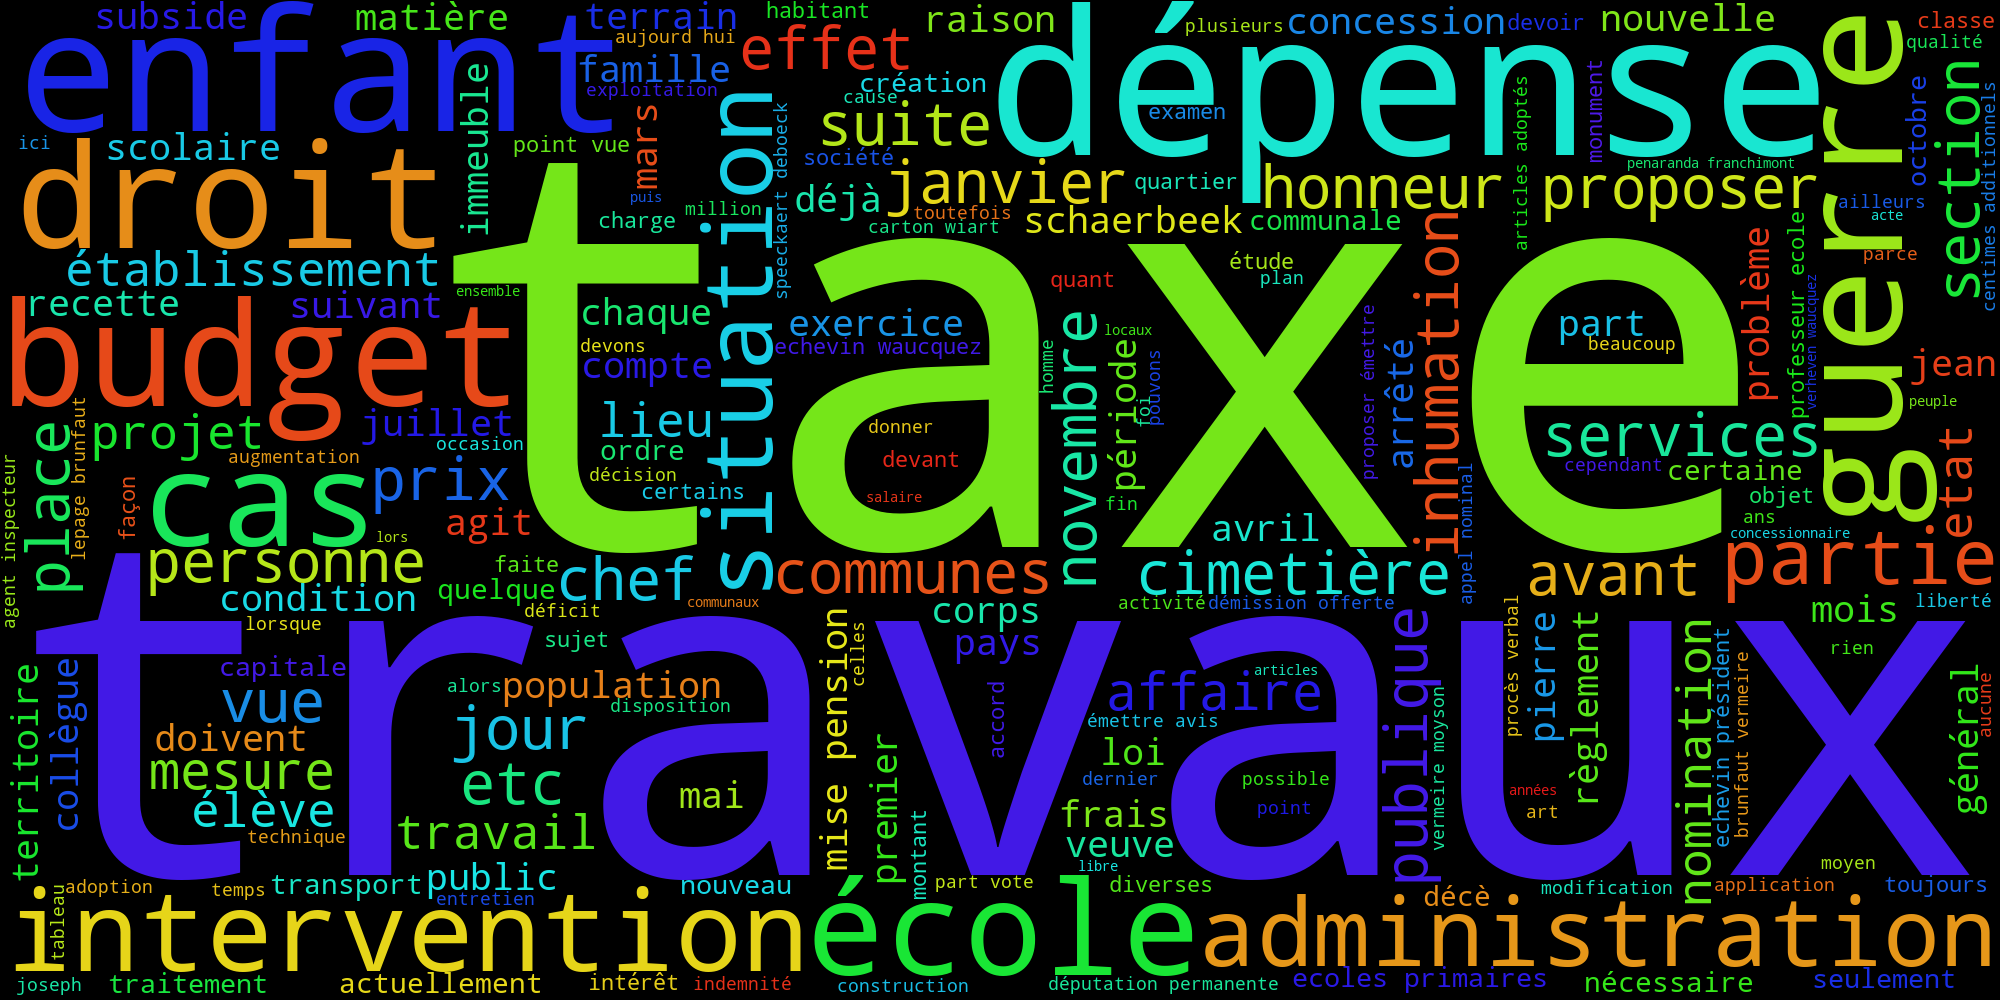

In [39]:
from IPython.display import Image

Image(filename=f'{data_path}/{year}.png')